In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('ham_lyrics.csv', engine='python')

In [4]:
df.head()

,title,speaker,lines
0,Alexander Hamilton,BURR,"How does a bastard, orphan, son of a whore and a"
1,Alexander Hamilton,BURR,"Scotsman, dropped in the middle of a forgotten"
2,Alexander Hamilton,BURR,"Spot in the Caribbean by providence, impoveris..."
3,Alexander Hamilton,BURR,Grow up to be a hero and a scholar?
4,Alexander Hamilton,LAURENS,The ten-dollar Founding Father without a father


In [33]:
grouped_df = df.groupby('title')['lines'].apply(lambda x: ', '.join(x)).reset_index()
grouped_df.head(15)

,title,lines
0,A Winter's Ball,"How does the bastard, orphan, son of a whore, ..."
1,"Aaron Burr, Sir","1776. New York City, Pardon me. Are you Aaron ..."
2,Alexander Hamilton,"How does a bastard, orphan, son of a whore and..."
3,Best of Wives and Best of Women,"Alexander, come back to sleep, I have an early..."
4,Blow Us All Away,"Meet the latest graduate of King's College!, I..."
5,Burn,"I saved every letter you wrote me, From the mo..."
6,Cabinet Battle #1,"Ladies and gentlemen, you coulda been anywhere..."
7,Cabinet Battle #2,The issue on the table: France is on the verge...
8,Dear Theodosia,"Dear Theodosia, what to say to you?, You have ..."
9,Farmer Refuted,"Hear ye, hear ye! My name is Samuel Seabury, A..."


In [35]:
grouped_df['lines'][0]

"How does the bastard, orphan, son of a whore, Go on and on, Grow into more of a phenomenon?, Watch this obnoxious, arrogant, loudmouth bother, Be seated at the right hand of the father, Washington hires Hamilton right on sight, But Hamilton still wants to fight, not write, Now Hamilton's skill with a quill is undeniable, But what do we have in common? We're, Reliable with the, Ladies!, There are so many to deflower!, Ladies!, Looks! Proximity to power, Ladies!, They delighted and distracted him, Martha Washington named her feral tomcat after him!, That's true!, 1780, A winter's ball, And the Schuyler sisters are the envy of all, Yo, if you can marry a sister, you're rich, son, Is it a question of if, Burr, or which one?, Hey, Hey, Hey hey"

## Word Clouds for Dear Theodosia

In [36]:
grouped_df.loc[grouped_df['title'] == 'Dear Theodosia'].iloc[0]['lines']

"Dear Theodosia, what to say to you?, You have my eyes. You have your mother's name, When you came into the world, you cried and it broke my heart, I'm dedicating every day to you, Domestic life was never quite my style, When you smile, you knock me out, I fall apart, And I thought I was so smart, You will come of age with our young nation, We'll bleed and fight for you, we'll make it right for you, If we lay a strong enough foundation, We'll pass it on to you, we'll give the world to you, And you'll blow us all away..., Someday, someday, Yeah, you'll blow us all away, Someday, someday, Oh Philip, when you smile I am undone, My son, Look at my son. Pride is not the word I'm looking for, There is so much more inside me now, Oh Philip, you outshine the morning sun, My son, When you smile, I fall apart, And I thought I was so smart, My father wasn't around, My father wasn't around, I swear that, I'll be around for you , I'll be around for you, I'll do whatever it takes, I'll make a millio

Dear Theodosia


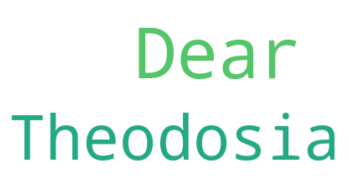

<Figure size 432x288 with 0 Axes>

In [43]:
# Start with Dear Theodosia:
text = grouped_df.loc[grouped_df['title'] == 'Dear Theodosia'].iloc[0]['lines']

# wordcloud the first line
full_text = text.split(',')[0]
print(full_text)

wordcloud = WordCloud(stopwords = [], background_color="white").generate(full_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# plt.savefig('wordclouds/dt0.png')


 what to say to you?


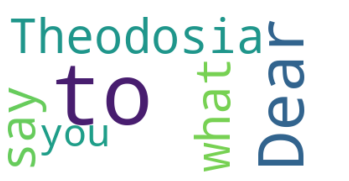

 You have my eyes. You have your mother's name


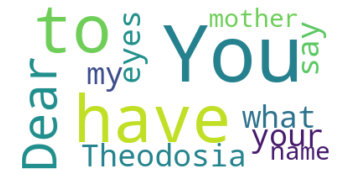

 When you came into the world


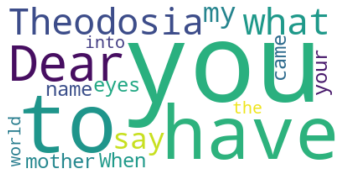

 you cried and it broke my heart


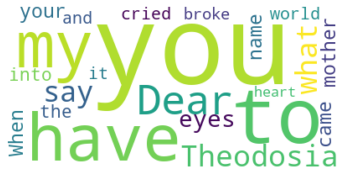

 I'm dedicating every day to you


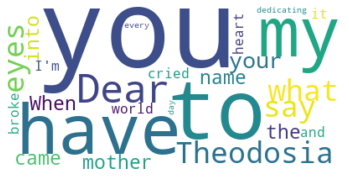

 Domestic life was never quite my style


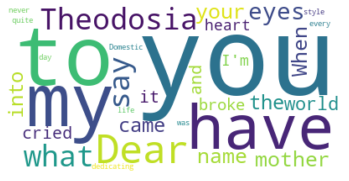

 When you smile


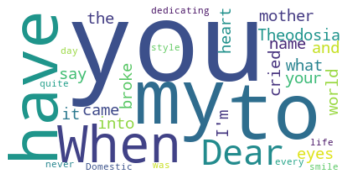

 you knock me out


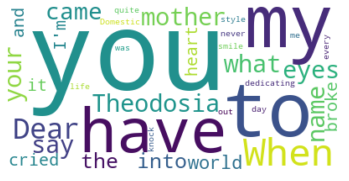

 I fall apart


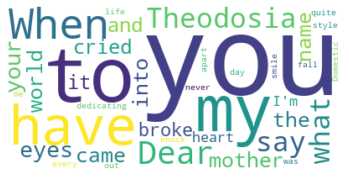

 And I thought I was so smart


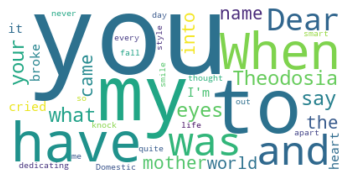

 You will come of age with our young nation


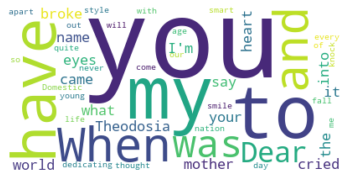

 We'll bleed and fight for you


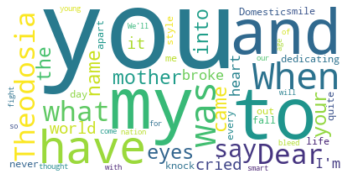

 we'll make it right for you


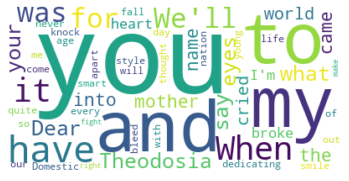

 If we lay a strong enough foundation


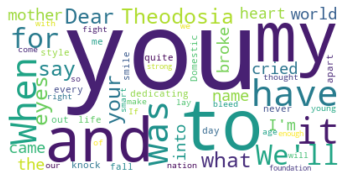

 We'll pass it on to you


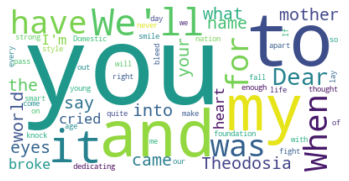

 we'll give the world to you


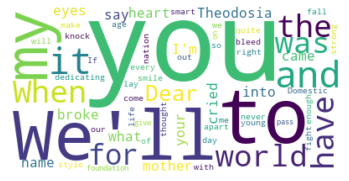

 And you'll blow us all away...


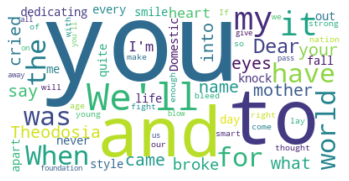

 Someday


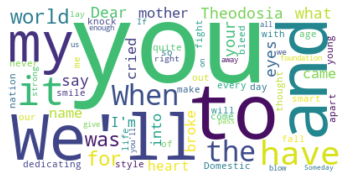

 someday


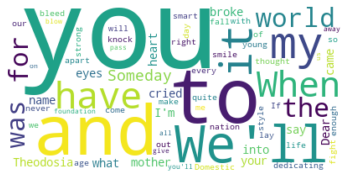

 Yeah


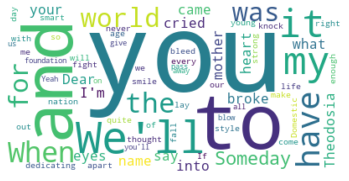

 you'll blow us all away


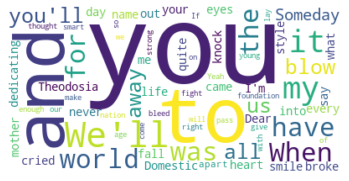

 Someday


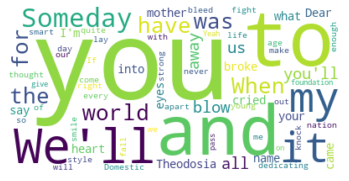

 someday


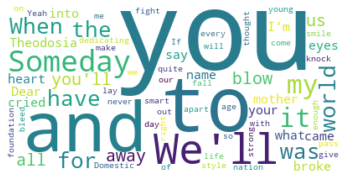

<Figure size 432x288 with 0 Axes>

In [44]:
curr_idx = 0

# Then word cloud all the other lines!
for item in text.split(',')[1:24]:
    
    full_text = full_text + " " + item
    print(item)
    curr_idx += 1
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords = [], background_color="white").generate(full_text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#     plt.savefig('wordclouds/dt{}.png'.format(curr_idx))

Now we also want one for the full song and another that has stop words removed.

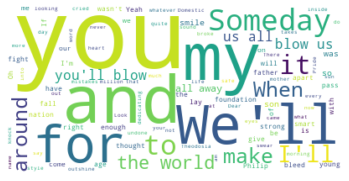

<Figure size 432x288 with 0 Axes>

In [46]:
# Full Dear Theodosia:
text = grouped_df.loc[grouped_df['title'] == 'Dear Theodosia'].iloc[0]['lines']

wordcloud = WordCloud(stopwords = [], background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wordclouds/dt-full.png')

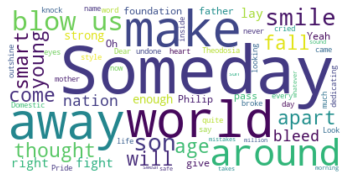

<Figure size 432x288 with 0 Axes>

In [47]:
# Full Dear Theodosia with stopwords removed:
text = grouped_df.loc[grouped_df['title'] == 'Dear Theodosia'].iloc[0]['lines']

wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wordclouds/dt-full-nonstop.png')

Notice that the main words (you, my, for, and, to, etc.) have been removed because they're typically the most common words in the english language. Keeping them in would mean every word cloud made would look more or less the same. 

## TF-IDF Word Clouds

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'sklearn'

In [54]:
def tokenize(document):
    tokens = [w for w in document.split() if len(w) > 2 and w.isalpha()]
    return tokens

In [55]:
# Example with snippet of dear theodosia
print(tokenize("Dear Theodosia, what to say to you?, You have my eyes. You have your mother's name, When you came into the world, you cried and it broke my heart, I'm dedicating every day to you,"))

['Dear', 'what', 'say', 'You', 'have', 'You', 'have', 'your', 'When', 'you', 'came', 'into', 'the', 'you', 'cried', 'and', 'broke', 'dedicating', 'every', 'day']


In [56]:

vectorizer = TfidfVectorizer( tokenizer = tokenize, ngram_range = ((2,2)))
tdm = vectorizer.fit_transform(grouped_df.lines)

NameError: name 'TfidfVectorizer' is not defined